In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('casestudy.csv', index_col=0)
df

,customer_email,net_revenue,year
0,nhknapwsbx@gmail.com,249.92,2015
1,joiuzbvcpn@gmail.com,87.61,2015
2,ukkjctepxt@gmail.com,168.38,2015
3,gykatilzrt@gmail.com,62.40,2015
4,mmsgsrtxah@gmail.com,43.08,2015
...,...,...,...
685922,qzqttwiftu@gmail.com,184.58,2017
685923,pjodiifjop@gmail.com,133.03,2017
685924,appaplmgko@gmail.com,200.98,2017
685925,wvkpmwsgck@gmail.com,235.35,2017


In [3]:
df.describe()

,net_revenue,year
count,685927.000000,685927.000000
mean,125.647755,2016.027252
std,71.854528,0.837203
min,1.000000,2015.000000
25%,63.510000,2015.000000
50%,125.730000,2016.000000
75%,187.820000,2017.000000
max,250.000000,2017.000000


In [4]:
df.isnull().sum()

customer_email    0
net_revenue       0
year              0
dtype: int64

In [5]:
df.year.value_counts()

2017    249987
2015    231294
2016    204646
Name: year, dtype: int64

## Total revenue for the current year

In [6]:
rev_df = df.groupby('year')['net_revenue'].sum().reset_index()
rev_df

,year,net_revenue
0,2015,29036749.19
1,2016,25730943.59
2,2017,31417495.03


## New Customer Revenue 

### 2017

In [7]:
cust_2016 = df[df["year"]==2016]['customer_email'].to_frame()
cust_2017 = df[df["year"]==2017]['customer_email'].to_frame()

In [8]:
#fetch new customer list
new_2017_cust_email = cust_2016.merge(cust_2017, how='outer', indicator=True).loc[lambda x : x['_merge']=='right_only'].customer_email.to_list()

In [9]:
new_2017_cust_df = df[(df['customer_email'].isin(new_2017_cust_email)) & (df['year'] == 2017)] 

In [10]:
#sum of new customer revenue
new_2017_cust_df.net_revenue.sum()

28776235.039999995

### 2016

In [11]:
cust_2015 = df[df["year"]==2015]['customer_email'].to_frame()
new_2016_cust_email = cust_2015.merge(cust_2016, how='outer', indicator=True).loc[lambda x : x['_merge']=='right_only'].customer_email.to_list()
new_2016_cust_df = df[(df['customer_email'].isin(new_2016_cust_email)) & (df['year'] == 2016)] 
new_2016_cust_df.net_revenue.sum()

18245491.01

## Revenue lost from attrition

### 2017

In [12]:
#fetch lost customer list
lost_2017_cust_email = cust_2017.merge(cust_2016, how='outer', indicator=True).loc[lambda x : x['_merge']=='right_only'].customer_email.to_list()

In [13]:
lost_2017_cust_df = df[(df['customer_email'].isin(lost_2017_cust_email)) & (df['year'] == 2016)] 

In [14]:
#sum of lost customer revenue(lost from 2016 to 2017)
lost_2017_cust_df.net_revenue.sum()

23110294.939999998

### 2016

In [15]:
lost_2016_cust_email = cust_2016.merge(cust_2015, how='outer', indicator=True).loc[lambda x : x['_merge']=='right_only'].customer_email.to_list()
lost_2016_cust_df = df[(df['customer_email'].isin(lost_2016_cust_email)) & (df['year'] == 2015)] 
lost_2016_cust_df.net_revenue.sum()

21571632.070000004

## Existing Customer Revenue Current Year

### 2017

In [16]:
exist_2017_cust = cust_2017.merge(cust_2016,how='inner', indicator=False).customer_email.to_list() 

In [17]:
exist_2017_cust_df = df[(df['customer_email'].isin(exist_2017_cust)) & (df['year'] == 2017)]

In [18]:
exist_2017_cust_df.net_revenue.sum()

2641259.99

### 2016

In [19]:
exist_2016_cust = cust_2016.merge(cust_2015,how='inner', indicator=False).customer_email.to_list() 
exist_2016_cust_df = df[(df['customer_email'].isin(exist_2016_cust)) & (df['year'] == 2016)]
exist_2016_cust_df.net_revenue.sum()

7485452.58

## Existing Customer Revenue Prior Year

### 2017

In [20]:
exist_2016_cust_df.net_revenue.sum()

7485452.58

## Existing Customer Growth

### 2017 - 2016

In [21]:
exist_2017_cust_df.net_revenue.sum() - exist_2016_cust_df.net_revenue.sum()

#Aren't able to get existing customer during 2015

-4844192.59

## Total Customers Current Year

### 2017

In [22]:
cust_2017

,customer_email
435940,mwrossuukz@gmail.com
435941,qvjfterwnk@gmail.com
435942,vlyigtgfzs@gmail.com
435943,yfirychuhk@gmail.com
435944,fdkiioqtli@gmail.com
...,...
685922,qzqttwiftu@gmail.com
685923,pjodiifjop@gmail.com
685924,appaplmgko@gmail.com
685925,wvkpmwsgck@gmail.com


### 2016

In [23]:
cust_2016

,customer_email
231294,mwrossuukz@gmail.com
231295,gkwsoupawk@gmail.com
231296,vlyigtgfzs@gmail.com
231297,yfirychuhk@gmail.com
231298,trnzgqinuu@gmail.com
...,...
435935,mezrjfkced@gmail.com
435936,rdotspqdxi@gmail.com
435937,fkweqlmmjw@gmail.com
435938,pidugzoeej@gmail.com


### 2015

In [24]:
cust_2015

,customer_email
0,nhknapwsbx@gmail.com
1,joiuzbvcpn@gmail.com
2,ukkjctepxt@gmail.com
3,gykatilzrt@gmail.com
4,mmsgsrtxah@gmail.com
...,...
231289,xtrpmgjbwp@gmail.com
231290,peeorxpsbr@gmail.com
231291,vanasezjpw@gmail.com
231292,dnpremlztb@gmail.com


## Total Customers Previous Year

### 2017

In [25]:
cust_2016

,customer_email
231294,mwrossuukz@gmail.com
231295,gkwsoupawk@gmail.com
231296,vlyigtgfzs@gmail.com
231297,yfirychuhk@gmail.com
231298,trnzgqinuu@gmail.com
...,...
435935,mezrjfkced@gmail.com
435936,rdotspqdxi@gmail.com
435937,fkweqlmmjw@gmail.com
435938,pidugzoeej@gmail.com


### 2016

In [26]:
cust_2015

,customer_email
0,nhknapwsbx@gmail.com
1,joiuzbvcpn@gmail.com
2,ukkjctepxt@gmail.com
3,gykatilzrt@gmail.com
4,mmsgsrtxah@gmail.com
...,...
231289,xtrpmgjbwp@gmail.com
231290,peeorxpsbr@gmail.com
231291,vanasezjpw@gmail.com
231292,dnpremlztb@gmail.com


## New Customers

### 2017

In [27]:
new_2017_cust_df['customer_email'].to_frame()

,customer_email
435940,mwrossuukz@gmail.com
435941,qvjfterwnk@gmail.com
435942,vlyigtgfzs@gmail.com
435943,yfirychuhk@gmail.com
435944,fdkiioqtli@gmail.com
...,...
685922,qzqttwiftu@gmail.com
685923,pjodiifjop@gmail.com
685924,appaplmgko@gmail.com
685925,wvkpmwsgck@gmail.com


### 2016

In [28]:
new_2016_cust_df['customer_email'].to_frame()

,customer_email
231294,mwrossuukz@gmail.com
231295,gkwsoupawk@gmail.com
231296,vlyigtgfzs@gmail.com
231297,yfirychuhk@gmail.com
231298,trnzgqinuu@gmail.com
...,...
435933,sqodpufunf@gmail.com
435934,dcakqgznnm@gmail.com
435936,rdotspqdxi@gmail.com
435937,fkweqlmmjw@gmail.com


## Lost Customers

### 2017

In [29]:
lost_2017_cust_df['customer_email'].to_frame()

,customer_email
231294,mwrossuukz@gmail.com
231295,gkwsoupawk@gmail.com
231296,vlyigtgfzs@gmail.com
231297,yfirychuhk@gmail.com
231298,trnzgqinuu@gmail.com
...,...
435933,sqodpufunf@gmail.com
435935,mezrjfkced@gmail.com
435936,rdotspqdxi@gmail.com
435938,pidugzoeej@gmail.com


### 2016

In [30]:
lost_2016_cust_df['customer_email'].to_frame()

,customer_email
0,nhknapwsbx@gmail.com
1,joiuzbvcpn@gmail.com
2,ukkjctepxt@gmail.com
3,gykatilzrt@gmail.com
4,mmsgsrtxah@gmail.com
...,...
231289,xtrpmgjbwp@gmail.com
231290,peeorxpsbr@gmail.com
231291,vanasezjpw@gmail.com
231292,dnpremlztb@gmail.com


# EDA

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df_2015 = df[df['year'] == 2015]
df_2016 = df[df['year'] == 2016]
df_2017 = df[df['year'] == 2017]
df_2015.describe(),df_2016.describe(),df_2017.describe()

(         net_revenue      year
 count  231294.000000  231294.0
 mean      125.540434    2015.0
 std        71.793027       0.0
 min         1.000000    2015.0
 25%        63.430000    2015.0
 50%       125.655000    2015.0
 75%       187.560000    2015.0
 max       250.000000    2015.0,
          net_revenue      year
 count  204646.000000  204646.0
 mean      125.733919    2016.0
 std        71.838149       0.0
 min         1.000000    2016.0
 25%        63.722500    2016.0
 50%       125.760000    2016.0
 75%       187.890000    2016.0
 max       250.000000    2016.0,
          net_revenue      year
 count  249987.000000  249987.0
 mean      125.676515    2017.0
 std        71.924943       0.0
 min         1.000000    2017.0
 25%        63.390000    2017.0
 50%       125.810000    2017.0
 75%       187.970000    2017.0
 max       250.000000    2017.0)

/Users/xulehao/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/xulehao/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/xulehao/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

<AxesSubplot:xlabel='year', ylabel='net_revenue'>

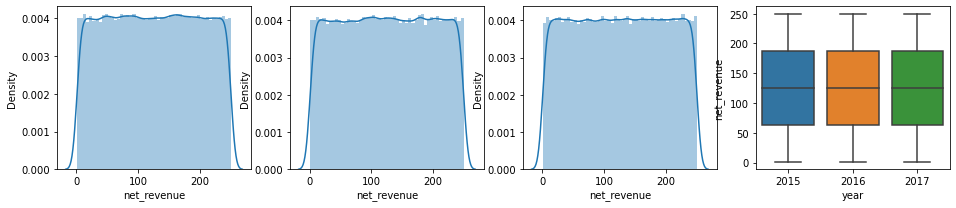

In [33]:
fig,axes=plt.subplots(figsize=(16,3), nrows=1, ncols=4)
df_2015 = df[df['year'] == 2015]
df_2016 = df[df['year'] == 2016]
df_2017 = df[df['year'] == 2017]
sns.distplot(df_2015['net_revenue'], ax=axes[0])
sns.distplot(df_2016['net_revenue'], ax=axes[1])
sns.distplot(df_2017['net_revenue'], ax=axes[2])
sns.boxplot(x="year", y="net_revenue", data=df, ax=axes[3])
#The distribution of each year is similar

In [34]:
#attrtion
lost_2017_cust = lost_2017_cust_df.year.value_counts().to_frame().rename(columns={"year":"lost_customer_nums"}).reset_index()
lost_2017_cust = lost_2017_cust.sort_values(by=['index'])
lost_2017_cust = lost_2017_cust.rename(columns={"index":"year"}).reset_index(drop=True)
lost_2017_cust['net_revenue'] = lost_2017_cust_df.net_revenue.sum()

lost_2016_cust = lost_2016_cust_df.year.value_counts().to_frame().rename(columns={"year":"lost_customer_nums"}).reset_index()
lost_2016_cust = lost_2016_cust.sort_values(by=['index'])
lost_2016_cust = lost_2016_cust.rename(columns={"index":"year"}).reset_index(drop=True)
lost_2016_cust['net_revenue'] = lost_2016_cust_df.net_revenue.sum()

lost_cust = lost_2017_cust.merge(lost_2016_cust,how="outer")
lost_cust = lost_cust.rename(columns={"net_revenue":"lost_net_revenue"})
lost_cust['year'][0] = 2017
lost_cust['year'][1] = 2016
lost_cust

<ipython-input-34-36f8212c143d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lost_cust['year'][0] = 2017
<ipython-input-34-36f8212c143d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lost_cust['year'][1] = 2016


,year,lost_customer_nums,lost_net_revenue
0,2017,183687,23110294.94
1,2016,171710,21571632.07


In [35]:
#new customer
new_2017_cust = new_2017_cust_df.year.value_counts().to_frame().rename(columns={"year":"new_customer_nums"}).reset_index()
new_2017_cust = new_2017_cust.sort_values(by=['index'])
new_2017_cust = new_2017_cust.rename(columns={"index":"year"}).reset_index(drop=True)
new_2017_cust['net_revenue'] = new_2017_cust_df.net_revenue.sum()

new_2016_cust = new_2016_cust_df.year.value_counts().to_frame().rename(columns={"year":"new_customer_nums"}).reset_index()
new_2016_cust = new_2016_cust.sort_values(by=['index'])
new_2016_cust = new_2016_cust.rename(columns={"index":"year"}).reset_index(drop=True)
new_2016_cust['net_revenue'] = new_2016_cust_df.net_revenue.sum()

new_cust = new_2017_cust.merge(new_2016_cust,how="outer")
new_cust = new_cust.rename(columns={"net_revenue":"new_net_revenue"})
new_cust


,year,new_customer_nums,new_net_revenue
0,2017,229028,28776235.04
1,2016,145062,18245491.01


In [36]:
#exist customer
exist_2017_cust = exist_2017_cust_df.year.value_counts().to_frame().rename(columns={"year":"exist_customer_nums"}).reset_index()
exist_2017_cust = exist_2017_cust.sort_values(by=['index'])
exist_2017_cust = exist_2017_cust.rename(columns={"index":"year"}).reset_index(drop=True)
exist_2017_cust['net_revenue'] = exist_2017_cust_df.net_revenue.sum()

exist_2016_cust = exist_2016_cust_df.year.value_counts().to_frame().rename(columns={"year":"exist_customer_nums"}).reset_index()
exist_2016_cust = exist_2016_cust.sort_values(by=['index'])
exist_2016_cust = exist_2016_cust.rename(columns={"index":"year"}).reset_index(drop=True)
exist_2016_cust['net_revenue'] = exist_2016_cust_df.net_revenue.sum()

exist_cust = exist_2017_cust.merge(exist_2016_cust,how="outer")
exist_cust = exist_cust.rename(columns={"net_revenue":"exist_net_revenue"})
exist_cust


,year,exist_customer_nums,exist_net_revenue
0,2017,20959,2641259.99
1,2016,59584,7485452.58


In [37]:
#total customer each year
total_cust = df.year.value_counts().to_frame().rename(columns={"year":"customer_nums"}).reset_index()
total_cust = total_cust.sort_values(by=['index'])
total_cust = total_cust.rename(columns={"index":"year"}).reset_index(drop=True)
total_cust = total_cust.merge(rev_df,how='outer')
total_cust

,year,customer_nums,net_revenue
0,2015,231294,29036749.19
1,2016,204646,25730943.59
2,2017,249987,31417495.03


In [38]:
#merge all the dataframe
customer_df = total_cust.merge(new_cust,how='outer')
customer_df = customer_df.merge(exist_cust,how='outer')
customer_df = customer_df.merge(lost_cust,how='outer')
customer_df = customer_df.fillna(0)
customer_df

,year,customer_nums,net_revenue,new_customer_nums,new_net_revenue,exist_customer_nums,exist_net_revenue,lost_customer_nums,lost_net_revenue
0,2015,231294,29036749.19,0.0,0.00,0.0,0.00,0.0,0.00
1,2016,204646,25730943.59,145062.0,18245491.01,59584.0,7485452.58,171710.0,21571632.07
2,2017,249987,31417495.03,229028.0,28776235.04,20959.0,2641259.99,183687.0,23110294.94


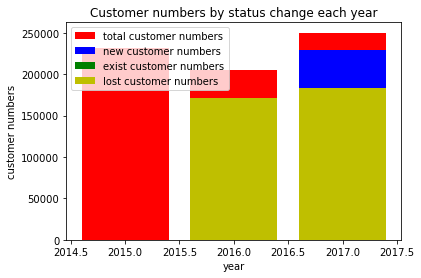

In [39]:
plt.bar(customer_df['year'],customer_df['customer_nums'],color='r')
plt.bar(customer_df['year'],customer_df['new_customer_nums'],color='b')
plt.bar(customer_df['year'],customer_df['exist_customer_nums'],color='g')
plt.bar(customer_df['year'],customer_df['lost_customer_nums'],color='y')
plt.xlabel("year")
plt.ylabel("customer numbers")
plt.legend(["total customer numbers", "new customer numbers", "exist customer numbers", "lost customer numbers"])
plt.title("Customer numbers by status change each year")
plt.show()

<AxesSubplot:title={'center':'Customer numbers by status change each year'}, xlabel='year'>

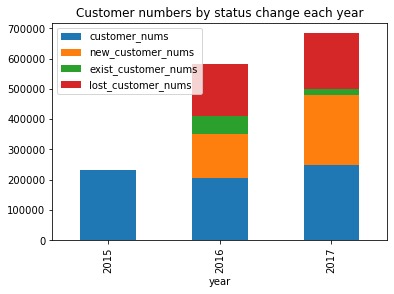

In [40]:
#customer amount each year
customer_df[['year','customer_nums','new_customer_nums','exist_customer_nums','lost_customer_nums']].plot(
    x='year', kind='bar', stacked=True,title='Customer numbers by status change each year')

<AxesSubplot:title={'center':'Net revenue by status change each year'}, xlabel='year'>

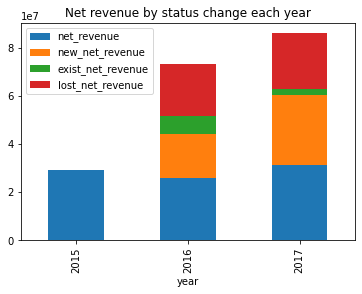

In [41]:
#net revenue each year
customer_df[['year','net_revenue','new_net_revenue','exist_net_revenue','lost_net_revenue']].plot(
    x='year', kind='bar', stacked=True,title='Net revenue by status change each year')


* The new customers' numbers and revenue have the highest proportion and has grown from 2016 to 2017, whcih means the marketing strategy for the newcomers is on the right track and should be maintain.
* The exist customer (the old customers) has become smaller, which means the company should focus on the old customer, deliver some old customers' discount to make them stay.
* Lastly, the lost of the customers doesn't seem change a lot, all the company should do is decrease the proportion of this part.